In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
reviewpath = '/content/drive/MyDrive/CMPE256/Data/yelp_academic_dataset_review.json'
userpath = '/content/drive/MyDrive/CMPE256/Data/yelp_academic_dataset_review.json'

In [ ]:
global reviews
reviews = []
global users
users = []

#### Loading Reviews data

In [ ]:
def loadReviewData():
    global reviews
    with open(reviewpath, encoding='utf-8') as fin:
        i = 0 
        for line in fin:
            line_contents = json.loads(line)
            reviews.append(line_contents)
    print("Read {count} reviews".format(count=len(reviews)))
    return
loadReviewData()

Read 6990280 reviews


#### Loading Users data

In [ ]:
def loadUsersData():
    global users
    with open(userpath, encoding='utf-8') as fin:
        i = 0 
        for line in fin:
            line_contents = json.loads(line)
            users.append(line_contents)
    print("Read {count} users".format(count=len(users)))
    return
loadUsersData()

#### Total Reviews given by each User

In [ ]:
def totalreviewsperuser():
  totalReviewCount = {}
  for review in reviews:
    userId = review["user_id"]
    if userId in totalReviewCount:
        totalReviewCount[userId] += 1
    else:
        totalReviewCount[userId] = 1
  sum(totalReviewCount.values())
  sum([user['review_count'] for user in users])
  return
totalreviewsperuser()

In [ ]:
!pip install stop_words

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=02704accaf0e6c079f4900b777b93da5873b43f5822bf0bf998bb51203001370
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


# Sentiment analysis on review dataset  

In [ ]:
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
import re
from textblob import TextBlob
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
californiareviews = pd.read_csv('/content/drive/MyDrive/CMPE256/Data/CSVfiles/California_reviews.csv')
users = pd.read_csv('/content/drive/MyDrive/CMPE256/Data/CSVfiles/CA_users.csv', usecols= ['user_id', 'is_elite'])

In [ ]:
elite_reviews_df = californiareviews.merge(users, how='left', on=['user_id'], indicator=True)
elite_reviews_df = elite_reviews_df.loc[elite_reviews_df['is_elite'] == True]
elite_reviews_df.shape

(48367, 13)

In [ ]:
californiareviews = elite_reviews_df

In [ ]:
bag_of_words = californiareviews['text']

In [ ]:
def filterWords():
  bag_of_words = californiareviews['text'].str.lower().str.cat(sep=' ')
  bag_of_words = re.sub('[^A-Za-z]+', ' ', bag_of_words)
  bag_of_words[0:1001]
  stop_words = list(get_stop_words('en'))         
  nltk_words = list(stopwords.words('english'))   
  stop_words.extend(nltk_words)
  restaurant_stop_words=['food', 'taste' , 'place']
  stop_words.extend(restaurant_stop_words)
  word_tokens = word_tokenize(bag_of_words)
  # Remove characters which have length less than 2  
  without_single_chr = [word for word in word_tokens if len(word) > 3]

  # Remove numbers
  cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]
  filtered_sentence = []
  for w in cleaned_data_title:
    if w not in stop_words:
        filtered_sentence.append(w)
  return filtered_sentence



In [ ]:
cleaned_data_title =filterWords()

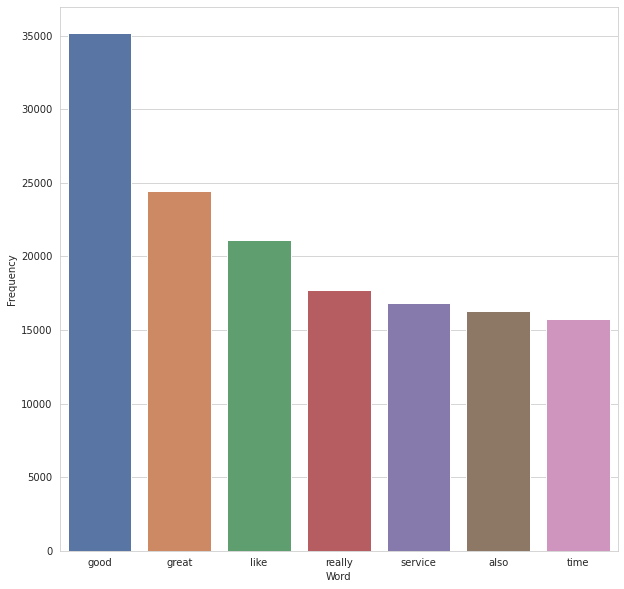

In [ ]:
top_N = 1000
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7) , palette = "deep")

In [ ]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 100,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

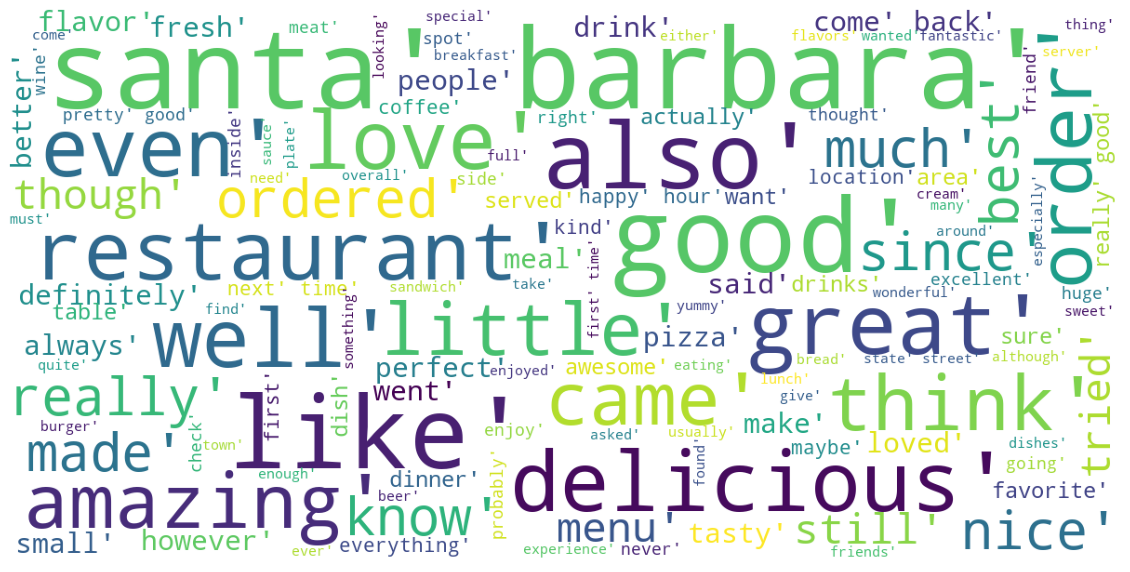

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(cleaned_data_title)

In [ ]:
bloblist_desc = list()
reviews_df_sentiment_analysis = californiareviews[['review_id','text']].astype(str)

In [ ]:
reviews_df_sentiment_analysis.head(n=5)

,review_id,text
2,YbMyvlDA2W3Py5lTz8VK-A,"Great burgers,fries and salad! Burgers have a..."
4,4zopEEPqfwm-c_FNpeHZYw,We were a bit weary about trying the Shellfish...
11,bi6GaeWDGceGv62lXTIKQA,Very disappointed. We went to eat at 2:15 on ...
16,dpgq69tsI2f_GpRH71hQsA,This was a tough one! On the merits of the w...
18,OYrtEEEu0qLiTdwlPm9egQ,"I love trying fresh seafood on piers, wharfs a..."


In [ ]:
# for idx in range(len(df_review_str)):
reviews_df_sentiment_analysis = reviews_df_sentiment_analysis.reset_index()
for index, row in reviews_df_sentiment_analysis.iterrows():
    blob = TextBlob(row['text'])
    bloblist_desc.append((row['review_id'], row['text'],blob.sentiment.polarity, blob.sentiment.subjectivity))
df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['review_id', 'Review','sentiment','polarity'])
df_polarity_desc.head()

,review_id,Review,sentiment,polarity
0,YbMyvlDA2W3Py5lTz8VK-A,"Great burgers,fries and salad! Burgers have a...",0.315000,0.510000
1,4zopEEPqfwm-c_FNpeHZYw,We were a bit weary about trying the Shellfish...,0.260518,0.529153
2,bi6GaeWDGceGv62lXTIKQA,Very disappointed. We went to eat at 2:15 on ...,-0.241667,0.451190
3,dpgq69tsI2f_GpRH71hQsA,This was a tough one! On the merits of the w...,0.284036,0.579497
4,OYrtEEEu0qLiTdwlPm9egQ,"I love trying fresh seafood on piers, wharfs a...",0.295561,0.570096


In [ ]:
def df_filter(df_polarity_desc):
    if df_polarity_desc['sentiment'] > 0:
        val = "Positive Review"
    elif df_polarity_desc['sentiment'] == 0:
        val = "Neutral Review"
    else:
        val = "Negative Review"
    return val

In [ ]:
df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(df_filter,axis=1)

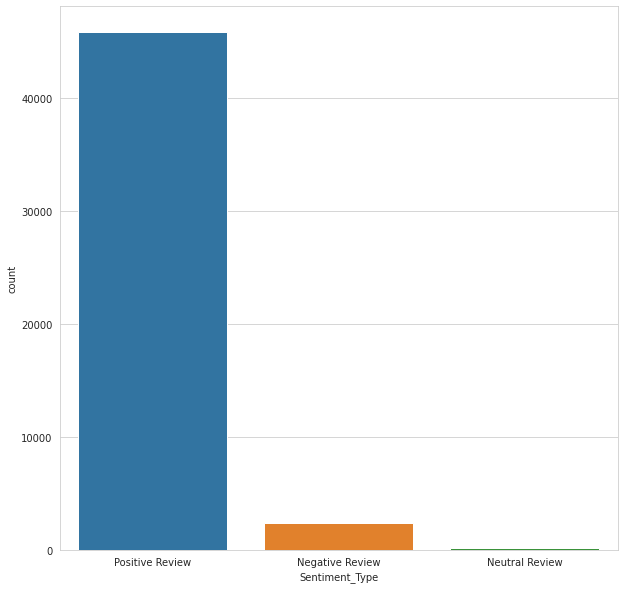

In [ ]:
def plot_review_distribution():
  plt.figure(figsize=(10,10))
  sns.set_style("whitegrid")
  ax = sns.countplot(x="Sentiment_Type", data=df_polarity_desc)
plot_review_distribution()

In [ ]:
positive_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Positive Review']
negative_reviews=df_polarity_desc[df_polarity_desc['Sentiment_Type']=='Negative Review']

In [ ]:
negative_reviews.head(10)

,review_id,Review,sentiment,polarity,Sentiment_Type
2,bi6GaeWDGceGv62lXTIKQA,Very disappointed. We went to eat at 2:15 on ...,-0.241667,0.451190,Negative Review
14,34EQgWpvduSSEC_qXPDoyQ,Came down here for some of their tasty fish ta...,-0.127778,0.194444,Negative Review
44,kU-CIZOw-tdXd_2lo4nxmA,I don't know why i had such high expectations ...,-0.060463,0.571111,Negative Review
55,mqjhJMhlR_qmpVkc51WKYQ,This place has the worst customer service. My ...,-0.088581,0.645397,Negative Review
76,tmYPdYZs79HQaClyoY2BsA,"Sometimes a big slice of simple, greasy pepper...",-0.045833,0.400893,Negative Review
99,wedRA1Cw3y3bu4SjqtMSMw,"I was really eager to try this place, my dog a...",-0.180750,0.429000,Negative Review
106,DhF4sM_UdxD1xB5w8Sb08w,Sigh ... Javan's is no more :'( I miss it alr...,-0.625000,0.750000,Negative Review
113,goO4ZgehHwgY6ApfscpoIA,We stopped in for a quick bite for lunch time....,-0.054630,0.628704,Negative Review
126,Zwh3HNWNK3x4prbMT3-n-g,Food is what you'd expect at any In-N-Out. Wha...,-0.111667,0.701667,Negative Review
159,W51u88bEHy3SpXIr6YXLcA,Yummy cold brew coffee & friendly staff. Howev...,-0.032143,0.571429,Negative Review


### Extracting Reviews with less subjectivity and less neutrality



In [ ]:
filtered_reviews = df_polarity_desc.loc[df_polarity_desc['polarity'] <= 0.6]
filtered_reviews = filtered_reviews.loc[~((filtered_reviews['sentiment'] <= 0.2) & (filtered_reviews['sentiment'] >= -0.2))]
filtered_reviews.shape

(18492, 5)

In [ ]:
filtered_reviews.head(10)

,review_id,Review,sentiment,polarity,Sentiment_Type
0,YbMyvlDA2W3Py5lTz8VK-A,"Great burgers,fries and salad! Burgers have a...",0.315000,0.510000,Positive Review
1,4zopEEPqfwm-c_FNpeHZYw,We were a bit weary about trying the Shellfish...,0.260518,0.529153,Positive Review
2,bi6GaeWDGceGv62lXTIKQA,Very disappointed. We went to eat at 2:15 on ...,-0.241667,0.451190,Negative Review
3,dpgq69tsI2f_GpRH71hQsA,This was a tough one! On the merits of the w...,0.284036,0.579497,Positive Review
4,OYrtEEEu0qLiTdwlPm9egQ,"I love trying fresh seafood on piers, wharfs a...",0.295561,0.570096,Positive Review
5,i6qS_PlGj4kl_2u55WKa5Q,I stopped in because I was hungry for some sna...,0.224074,0.447222,Positive Review
6,jAhIJTYtHsZKSvGknSwMcg,Real Thai food and they'll make it spicy if yo...,0.388889,0.561111,Positive Review
8,fMGOJq3i_DUUukBg7QU9SA,So it is a good friends birthday today and we ...,0.350253,0.535354,Positive Review
12,GAs-wxJPWKnPLRNeUzvcUQ,"Aside from the occasional Eggs Benny, whenever...",0.350865,0.471053,Positive Review
17,t0HXEO7zQBSfvGSI3RU8cA,Always crowded but how can you blame them? Las...,0.500000,0.455556,Positive Review


In [ ]:
filtered_reviews.to_csv('/content/drive/MyDrive/CMPE256/Data/CSVfiles/sentiment_reviews_CA.csv')